# MDS mit euklidischer Distanz

## 1) Einlesen der Daten

In [1]:
file_path = "../data/030_dsc_experiments.csv"

In [2]:
import pandas as pd
import numpy as np

# Einlesen der CSV-Datei
df_experiments = pd.read_csv(file_path, index_col=0)
df_experiments

,L001_S3,L001_S5,L002_S3,L002_S5,L003_S3,L003_S5,L004_S3,L004_S5,L005_S3,L005_S5,...,L383_S3,L383_S5,L384_S3,L384_S5,L385_S3,L385_S5,L386_S3,L386_S5,L387_S3,L387_S5
Temp./°C,,,,,,,,,,,,,,,,,,,,,
-24,-0.21989,0.16598,-0.20426,0.15589,-0.21713,0.15900,-0.19927,0.16244,-0.22834,0.17739,...,-0.18067,0.17461,-0.21344,0.19298,-0.19186,0.18028,-0.20261,0.19231,-0.20920,0.19564
-23,-0.22134,0.16647,-0.20408,0.15648,-0.21732,0.15971,-0.20029,0.16288,-0.22837,0.17797,...,-0.18135,0.17530,-0.21442,0.19361,-0.19282,0.18083,-0.20349,0.19302,-0.21002,0.19661
-22,-0.22069,0.16703,-0.20420,0.15707,-0.21706,0.16041,-0.20056,0.16350,-0.22794,0.17882,...,-0.18193,0.17578,-0.21536,0.19430,-0.19367,0.18136,-0.20438,0.19379,-0.21093,0.19738
-21,-0.22040,0.16769,-0.20415,0.15773,-0.21713,0.16099,-0.20061,0.16419,-0.22836,0.17962,...,-0.18263,0.17655,-0.21599,0.19511,-0.19413,0.18202,-0.20510,0.19448,-0.21164,0.19795
-20,-0.22059,0.16849,-0.20421,0.15857,-0.21691,0.16159,-0.20101,0.16484,-0.22840,0.18030,...,-0.18334,0.17710,-0.21663,0.19593,-0.19459,0.18269,-0.20588,0.19512,-0.21252,0.19866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,-0.14800,0.30041,-0.15145,0.28398,-0.15596,0.29227,-0.16994,0.29114,-0.17889,0.31237,...,-0.20089,0.34542,-0.19769,0.42751,-0.21116,0.35646,-0.21207,0.38997,-0.21226,0.41070
271,-0.14738,0.30087,-0.14924,0.28462,-0.15565,0.29285,-0.16835,0.29161,-0.17823,0.31277,...,-0.20402,0.34589,-0.19540,0.42880,-0.21123,0.35731,-0.21093,0.39048,-0.21260,0.41161
272,-0.14694,0.30134,-0.14925,0.28520,-0.15352,0.29349,-0.16734,0.29197,-0.17898,0.31313,...,-0.20251,0.34632,-0.19537,0.42980,-0.21137,0.35797,-0.21101,0.39123,-0.21037,0.41242


## 2) Filtern der relevanten Daten (Segment "_S5")

In [3]:
# Filtern der Spalten, die "_S5" enthalten (Segment 5 "Erhitzen")
columns_s5 = [col for col in df_experiments.columns if "_S5" in col]
df_heating = df_experiments[columns_s5]
df_heating

,L001_S5,L002_S5,L003_S5,L004_S5,L005_S5,L006_S5,L007_S5,L008_S5,L009_S5,L010_S5,...,L378_S5,L379_S5,L380_S5,L381_S5,L382_S5,L383_S5,L384_S5,L385_S5,L386_S5,L387_S5
Temp./°C,,,,,,,,,,,,,,,,,,,,,
-24,0.16598,0.15589,0.15900,0.16244,0.17739,0.15898,0.19158,0.12865,0.16992,0.15554,...,0.18864,0.17923,0.16501,0.17974,0.19352,0.17461,0.19298,0.18028,0.19231,0.19564
-23,0.16647,0.15648,0.15971,0.16288,0.17797,0.15965,0.19234,0.12905,0.17126,0.15602,...,0.18901,0.17957,0.16534,0.18038,0.19412,0.17530,0.19361,0.18083,0.19302,0.19661
-22,0.16703,0.15707,0.16041,0.16350,0.17882,0.16053,0.19321,0.12990,0.17218,0.15668,...,0.18936,0.17976,0.16552,0.18118,0.19484,0.17578,0.19430,0.18136,0.19379,0.19738
-21,0.16769,0.15773,0.16099,0.16419,0.17962,0.16126,0.19418,0.13042,0.17261,0.15750,...,0.18964,0.18014,0.16566,0.18214,0.19572,0.17655,0.19511,0.18202,0.19448,0.19795
-20,0.16849,0.15857,0.16159,0.16484,0.18030,0.16198,0.19513,0.13134,0.17323,0.15821,...,0.19009,0.18050,0.16584,0.18279,0.19643,0.17710,0.19593,0.18269,0.19512,0.19866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,0.30041,0.28398,0.29227,0.29114,0.31237,0.29696,0.35333,0.24355,0.29402,0.27868,...,0.32401,0.28104,0.23809,0.38291,0.40321,0.34542,0.42751,0.35646,0.38997,0.41070
271,0.30087,0.28462,0.29285,0.29161,0.31277,0.29735,0.35370,0.24381,0.29462,0.27920,...,0.32388,0.28115,0.23848,0.38371,0.40416,0.34589,0.42880,0.35731,0.39048,0.41161
272,0.30134,0.28520,0.29349,0.29197,0.31313,0.29766,0.35416,0.24410,0.29504,0.27958,...,0.32438,0.28137,0.23848,0.38417,0.40468,0.34632,0.42980,0.35797,0.39123,0.41242


## 3) Normalisierung der Daten

In [4]:
from sklearn.preprocessing import StandardScaler

# Normalisierung der Daten
scaler = StandardScaler()
data_normalized = scaler.fit_transform(df_heating)

# Umwandlung zurück in ein DataFrame
df_heating_normalized = pd.DataFrame(data_normalized, columns=df_heating.columns, index=df_heating.index)
df_heating_normalized

,L001_S5,L002_S5,L003_S5,L004_S5,L005_S5,L006_S5,L007_S5,L008_S5,L009_S5,L010_S5,...,L378_S5,L379_S5,L380_S5,L381_S5,L382_S5,L383_S5,L384_S5,L385_S5,L386_S5,L387_S5
Temp./°C,,,,,,,,,,,,,,,,,,,,,
-24,-1.895041,-1.897818,-1.855503,-1.765930,-1.863076,-1.827870,-1.660864,-1.416342,-1.426349,-1.434633,...,-1.715853,-1.801938,-1.827286,-1.744524,-1.678665,-1.750991,-1.644064,-1.744776,-1.698102,-1.683924
-23,-1.882417,-1.881884,-1.836973,-1.754211,-1.848531,-1.811597,-1.647737,-1.408902,-1.401805,-1.425468,...,-1.706779,-1.791030,-1.812395,-1.733745,-1.668887,-1.737117,-1.634867,-1.734210,-1.685843,-1.668554
-22,-1.867989,-1.865950,-1.818703,-1.737699,-1.827214,-1.790222,-1.632710,-1.393094,-1.384954,-1.412866,...,-1.698195,-1.784934,-1.804272,-1.720271,-1.657155,-1.727466,-1.624793,-1.724028,-1.672547,-1.656353
-21,-1.850984,-1.848126,-1.803566,-1.719323,-1.807151,-1.772491,-1.615955,-1.383423,-1.377078,-1.397210,...,-1.691328,-1.772742,-1.797954,-1.704102,-1.642815,-1.711984,-1.612968,-1.711348,-1.660633,-1.647321
-20,-1.830373,-1.825441,-1.787906,-1.702012,-1.790098,-1.755003,-1.599546,-1.366312,-1.365722,-1.383654,...,-1.680292,-1.761191,-1.789831,-1.693154,-1.631245,-1.700925,-1.600997,-1.698476,-1.649582,-1.636070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,1.568443,1.561448,1.622739,1.661635,1.521990,1.523536,1.133003,0.720599,0.846721,0.916509,...,1.604126,1.464555,1.470569,1.677439,1.738354,1.683449,1.779895,1.639878,1.714896,1.723827
271,1.580295,1.578732,1.637877,1.674152,1.532021,1.533008,1.139394,0.725434,0.857711,0.926437,...,1.600937,1.468084,1.488168,1.690913,1.753835,1.692899,1.798728,1.656208,1.723702,1.738247
272,1.592404,1.594396,1.654580,1.683739,1.541049,1.540538,1.147339,0.730828,0.865404,0.933692,...,1.613200,1.475143,1.488168,1.698661,1.762309,1.701545,1.813328,1.668887,1.736652,1.751082


In [5]:
# Intervallgrenzen von -20 bis 270 in 20-Schritten
interval_groups = list(range(-20, 271, 20))

# Dictionary aus DataFrames für jedes Intervall erstellen
interval_dataframes = {
    f"{interval_groups[i]} bis {interval_groups[i + 1]}": 
    df_heating_normalized.loc[
        (df_heating_normalized.index >= interval_groups[i]) & 
        (df_heating_normalized.index < interval_groups[i + 1])
    ]
    for i in range(len(interval_groups) - 1)
}

In [6]:
# Beispiel: Zugriff auf den DataFrame für ein Intervall
example_interval_df = interval_dataframes["-20 bis 0"]  # Ersetze mit einem gewünschten Intervall

# Ergebnis anzeigen
example_interval_df

,L001_S5,L002_S5,L003_S5,L004_S5,L005_S5,L006_S5,L007_S5,L008_S5,L009_S5,L010_S5,...,L378_S5,L379_S5,L380_S5,L381_S5,L382_S5,L383_S5,L384_S5,L385_S5,L386_S5,L387_S5
Temp./°C,,,,,,,,,,,,,,,,,,,,,
-20,-1.830373,-1.825441,-1.787906,-1.702012,-1.790098,-1.755003,-1.599546,-1.366312,-1.365722,-1.383654,...,-1.680292,-1.761191,-1.789831,-1.693154,-1.631245,-1.700925,-1.600997,-1.698476,-1.649582,-1.636070
-19,-1.806670,-1.803565,-1.768071,-1.687897,-1.770788,-1.737515,-1.585555,-1.347900,-1.348871,-1.371243,...,-1.667784,-1.749962,-1.775391,-1.679848,-1.613808,-1.687856,-1.590339,-1.686181,-1.638531,-1.624820
-18,-1.783225,-1.784931,-1.744321,-1.674847,-1.751227,-1.721970,-1.572773,-1.339345,-1.333302,-1.358451,...,-1.653069,-1.736166,-1.765914,-1.667721,-1.599305,-1.672574,-1.579974,-1.671004,-1.621091,-1.612777
-17,-1.765190,-1.766566,-1.722658,-1.657270,-1.732669,-1.706182,-1.555673,-1.334137,-1.321762,-1.342603,...,-1.643749,-1.721728,-1.751925,-1.653573,-1.589365,-1.657092,-1.568878,-1.656788,-1.607278,-1.600576
-16,-1.745609,-1.750092,-1.704650,-1.641824,-1.715867,-1.687965,-1.542892,-1.316655,-1.312421,-1.325419,...,-1.627317,-1.707932,-1.736582,-1.638920,-1.579588,-1.643017,-1.556761,-1.644300,-1.599508,-1.588692
-15,-1.726028,-1.733618,-1.685336,-1.624513,-1.701321,-1.671692,-1.527864,-1.304008,-1.296852,-1.311863,...,-1.613828,-1.693815,-1.723044,-1.624266,-1.565411,-1.628340,-1.546541,-1.632582,-1.586903,-1.577125
-14,-1.707993,-1.712013,-1.672026,-1.607202,-1.684519,-1.655418,-1.514737,-1.298801,-1.282931,-1.299452,...,-1.600585,-1.680660,-1.701834,-1.612308,-1.551722,-1.614667,-1.535446,-1.620094,-1.573262,-1.564924
-13,-1.691246,-1.696890,-1.652973,-1.592820,-1.664205,-1.641816,-1.501610,-1.281690,-1.272674,-1.289715,...,-1.591265,-1.667505,-1.693260,-1.599339,-1.537871,-1.601799,-1.521577,-1.608375,-1.562038,-1.551455
-12,-1.675015,-1.683116,-1.634182,-1.579771,-1.650412,-1.627485,-1.488310,-1.270717,-1.265348,-1.282460,...,-1.584643,-1.653388,-1.688748,-1.585528,-1.525812,-1.586920,-1.508583,-1.595312,-1.551678,-1.540680


## 4) Transposition der Intervalle

In [7]:
# Alle DataFrames im Dictionary transponieren
transposed_interval_dataframes = {
    key: df.T for key, df in interval_dataframes.items()
}

# Beispiel: Zugriff auf den transponierten DataFrame für ein Intervall
example_transposed_interval_df = transposed_interval_dataframes["-20 bis 0"]  # Ersetze mit einem gewünschten Intervall

# Ergebnis anzeigen
example_transposed_interval_df.head()


Temp./°C,-20,-19,-18,-17,-16,-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1
L001_S5,-1.830373,-1.806670,-1.783225,-1.765190,-1.745609,-1.726028,-1.707993,-1.691246,-1.675015,-1.655176,-1.637657,-1.620137,-1.601587,-1.587159,-1.569639,-1.551347,-1.534342,-1.516565,-1.501622,-1.486936
L002_S5,-1.825441,-1.803565,-1.784931,-1.766566,-1.750092,-1.733618,-1.712013,-1.696890,-1.683116,-1.665562,-1.650708,-1.631534,-1.614790,-1.601557,-1.580491,-1.558076,-1.540522,-1.516486,-1.487589,-1.461663
L003_S5,-1.787906,-1.768071,-1.744321,-1.722658,-1.704650,-1.685336,-1.672026,-1.652973,-1.634182,-1.622176,-1.602341,-1.585898,-1.570761,-1.550925,-1.529002,-1.508384,-1.491158,-1.474977,-1.459056,-1.443136
L004_S5,-1.702012,-1.687897,-1.674847,-1.657270,-1.641824,-1.624513,-1.607202,-1.592820,-1.579771,-1.568585,-1.558997,-1.542752,-1.521712,-1.510527,-1.494814,-1.476171,-1.462056,-1.442881,-1.417314,-1.384024
L005_S5,-1.790098,-1.770788,-1.751227,-1.732669,-1.715867,-1.701321,-1.684519,-1.664205,-1.650412,-1.637372,-1.618061,-1.598751,-1.585961,-1.571917,-1.550851,-1.532043,-1.512733,-1.493924,-1.483642,-1.464081


In [8]:
# Transposition der Datenmatrix: Proben werden Zeilen
df_basis = df_heating_normalized.T
df_basis

Temp./°C,-24,-23,-22,-21,-20,-19,-18,-17,-16,-15,...,265,266,267,268,269,270,271,272,273,274
L001_S5,-1.895041,-1.882417,-1.867989,-1.850984,-1.830373,-1.806670,-1.783225,-1.765190,-1.745609,-1.726028,...,1.509958,1.521810,1.536238,1.548089,1.557107,1.568443,1.580295,1.592404,1.603225,1.611469
L002_S5,-1.897818,-1.881884,-1.865950,-1.848126,-1.825441,-1.803565,-1.784931,-1.766566,-1.750092,-1.733618,...,1.499333,1.504194,1.506355,1.522558,1.543353,1.561448,1.578732,1.594396,1.609519,1.624643
L003_S5,-1.855503,-1.836973,-1.818703,-1.803566,-1.787906,-1.768071,-1.744321,-1.722658,-1.704650,-1.685336,...,1.572890,1.584374,1.593247,1.605253,1.613344,1.622739,1.637877,1.654580,1.673894,1.689553
L004_S5,-1.765930,-1.754211,-1.737699,-1.719323,-1.702012,-1.687897,-1.674847,-1.657270,-1.641824,-1.624513,...,1.615295,1.625149,1.632073,1.637133,1.646188,1.661635,1.674152,1.683739,1.697854,1.711970
L005_S5,-1.863076,-1.848531,-1.827214,-1.807151,-1.790098,-1.770788,-1.751227,-1.732669,-1.715867,-1.701321,...,1.432962,1.450517,1.469074,1.489137,1.506441,1.521990,1.532021,1.541049,1.548322,1.557099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
L383_S5,-1.750991,-1.737117,-1.727466,-1.711984,-1.700925,-1.687856,-1.672574,-1.657092,-1.643017,-1.628340,...,1.629563,1.639214,1.653088,1.662940,1.670782,1.683449,1.692899,1.701545,1.714413,1.726477
L384_S5,-1.644064,-1.634867,-1.624793,-1.612968,-1.600997,-1.590339,-1.579974,-1.568878,-1.556761,-1.546541,...,1.724126,1.739893,1.750405,1.763544,1.770698,1.779895,1.798728,1.813328,1.822963,1.830263
L385_S5,-1.744776,-1.734210,-1.724028,-1.711348,-1.698476,-1.686181,-1.671004,-1.656788,-1.644300,-1.632582,...,1.588007,1.595692,1.606834,1.618169,1.631809,1.639878,1.656208,1.668887,1.679261,1.676956
L386_S5,-1.698102,-1.685843,-1.672547,-1.660633,-1.649582,-1.638531,-1.621091,-1.607278,-1.599508,-1.586903,...,1.653770,1.668275,1.675872,1.689858,1.707298,1.714896,1.723702,1.736652,1.744940,1.756164


## 5) Berechnung der Euklidischen Distanzen

In [9]:
from scipy.spatial.distance import pdist, squareform
from sklearn.manifold import MDS

# Iteration über alle Intervalle
for interval, df in transposed_interval_dataframes.items():
    # Berechnung der paarweisen Euklidischen Distanzen
    distance_matrix = squareform(pdist(df, metric="euclidean"))

    # Multidimensionale Skalierung (MDS)
    mds = MDS(n_components=2, dissimilarity="precomputed", normalized_stress="auto", random_state=42)
    mds_result = mds.fit_transform(distance_matrix)

    # MDS-Ergebnisse zu df hinzufügen
    df_basis[f"MDS1_{interval}"] = mds_result[:, 0]
    df_basis[f"MDS2_{interval}"] = mds_result[:, 1]

# Ergebnis: df_basis enthält jetzt die MDS-Komponenten für alle Intervalle
df_basis


Temp./°C,-24,-23,-22,-21,-20,-19,-18,-17,-16,-15,...,MDS1_160 bis 180,MDS2_160 bis 180,MDS1_180 bis 200,MDS2_180 bis 200,MDS1_200 bis 220,MDS2_200 bis 220,MDS1_220 bis 240,MDS2_220 bis 240,MDS1_240 bis 260,MDS2_240 bis 260
L001_S5,-1.895041,-1.882417,-1.867989,-1.850984,-1.830373,-1.806670,-1.783225,-1.765190,-1.745609,-1.726028,...,-0.235892,-0.195219,-0.468522,0.982729,-1.208744,1.345568,-1.856566,1.827018,-3.041527,1.950852
L002_S5,-1.897818,-1.881884,-1.865950,-1.848126,-1.825441,-1.803565,-1.784931,-1.766566,-1.750092,-1.733618,...,-0.276279,-0.469386,-0.569039,1.260895,-1.311625,1.543458,-1.934292,1.925044,-3.035831,1.938862
L003_S5,-1.855503,-1.836973,-1.818703,-1.803566,-1.787906,-1.768071,-1.744321,-1.722658,-1.704650,-1.685336,...,-0.269973,-0.187399,-0.500495,1.054420,-1.269906,1.436863,-1.967524,1.921014,-3.194775,2.047806
L004_S5,-1.765930,-1.754211,-1.737699,-1.719323,-1.702012,-1.687897,-1.674847,-1.657270,-1.641824,-1.624513,...,-0.280426,-0.226428,-0.581706,1.177801,-1.443623,1.616715,-2.156502,2.160441,-3.376199,2.165561
L005_S5,-1.863076,-1.848531,-1.827214,-1.807151,-1.790098,-1.770788,-1.751227,-1.732669,-1.715867,-1.701321,...,-0.239573,-0.338182,-0.491511,1.078614,-1.205823,1.373808,-1.824764,1.821253,-2.891617,1.832284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
L383_S5,-1.750991,-1.737117,-1.727466,-1.711984,-1.700925,-1.687856,-1.672574,-1.657092,-1.643017,-1.628340,...,-0.269935,-0.772844,-0.748974,1.551549,-1.635424,1.925779,-2.341767,2.381785,-3.564801,2.290102
L384_S5,-1.644064,-1.634867,-1.624793,-1.612968,-1.600997,-1.590339,-1.579974,-1.568878,-1.556761,-1.546541,...,-0.247371,-0.591259,-0.695729,1.411285,-1.596362,1.840510,-2.412567,2.384011,-3.902755,2.450866
L385_S5,-1.744776,-1.734210,-1.724028,-1.711348,-1.698476,-1.686181,-1.671004,-1.656788,-1.644300,-1.632582,...,-0.287670,-0.851711,-0.750219,1.593718,-1.584419,1.906699,-2.208748,2.247197,-3.397771,2.181881
L386_S5,-1.698102,-1.685843,-1.672547,-1.660633,-1.649582,-1.638531,-1.621091,-1.607278,-1.599508,-1.586903,...,-0.253747,-0.722511,-0.719394,1.503733,-1.592555,1.881196,-2.294619,2.325486,-3.593429,2.326804


## 7) Visualisierung der MDS-Ergebnisse

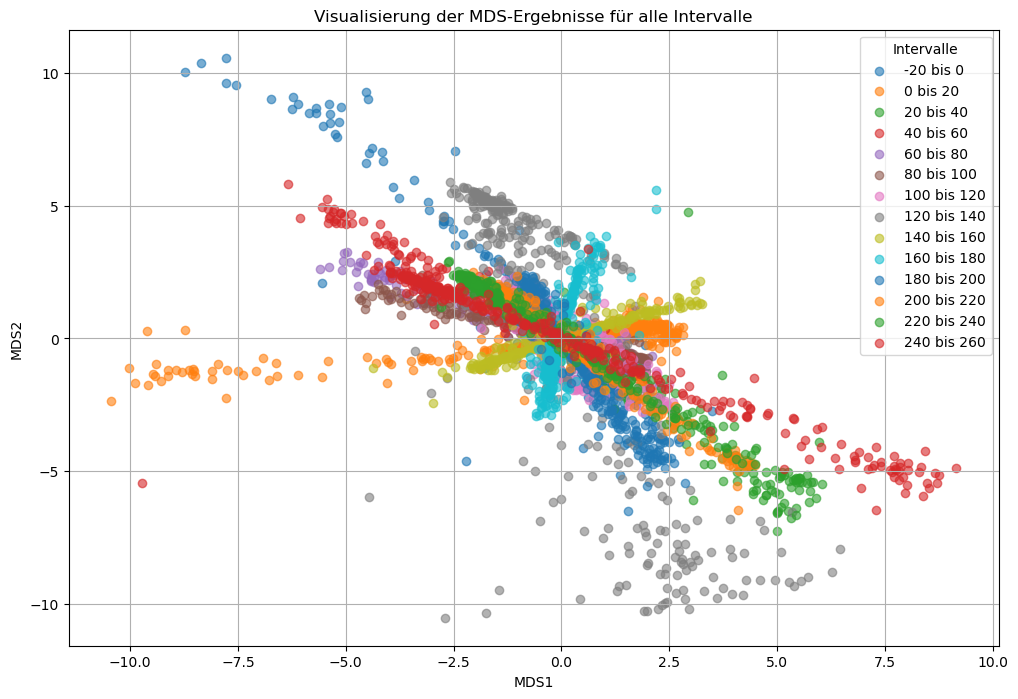

In [10]:
import matplotlib.pyplot as plt

# Vorbereitung für den Plot
plt.figure(figsize=(12, 8))

# Alle MDS-Spalten finden
mds_columns = [col for col in df_basis.columns if isinstance(col, str) and col.startswith("MDS1_")]

# Iteriere über die MDS-Komponenten für jedes Intervall
for mds1_col in mds_columns:
    # Den zugehörigen MDS2-Spaltennamen ermitteln
    mds2_col = mds1_col.replace("MDS1_", "MDS2_")
    
    # Extrahiere das Intervall aus dem Spaltennamen
    interval = mds1_col.replace("MDS1_", "")
    
    # Streudiagramm erstellen
    plt.scatter(
        df_basis[mds1_col], 
        df_basis[mds2_col], 
        label=interval, 
        alpha=0.6
    )

# Achsenbeschriftung und Titel
plt.title("Visualisierung der MDS-Ergebnisse für alle Intervalle")
plt.xlabel("MDS1")
plt.ylabel("MDS2")
plt.legend(title="Intervalle")
plt.grid(True)
plt.show()




## 8) Export als CSV

In [11]:
df_basis.index = df_basis.index.astype(str).str.replace('_S5', '', regex=False)
df_basis

Temp./°C,-24,-23,-22,-21,-20,-19,-18,-17,-16,-15,...,MDS1_160 bis 180,MDS2_160 bis 180,MDS1_180 bis 200,MDS2_180 bis 200,MDS1_200 bis 220,MDS2_200 bis 220,MDS1_220 bis 240,MDS2_220 bis 240,MDS1_240 bis 260,MDS2_240 bis 260
L001,-1.895041,-1.882417,-1.867989,-1.850984,-1.830373,-1.806670,-1.783225,-1.765190,-1.745609,-1.726028,...,-0.235892,-0.195219,-0.468522,0.982729,-1.208744,1.345568,-1.856566,1.827018,-3.041527,1.950852
L002,-1.897818,-1.881884,-1.865950,-1.848126,-1.825441,-1.803565,-1.784931,-1.766566,-1.750092,-1.733618,...,-0.276279,-0.469386,-0.569039,1.260895,-1.311625,1.543458,-1.934292,1.925044,-3.035831,1.938862
L003,-1.855503,-1.836973,-1.818703,-1.803566,-1.787906,-1.768071,-1.744321,-1.722658,-1.704650,-1.685336,...,-0.269973,-0.187399,-0.500495,1.054420,-1.269906,1.436863,-1.967524,1.921014,-3.194775,2.047806
L004,-1.765930,-1.754211,-1.737699,-1.719323,-1.702012,-1.687897,-1.674847,-1.657270,-1.641824,-1.624513,...,-0.280426,-0.226428,-0.581706,1.177801,-1.443623,1.616715,-2.156502,2.160441,-3.376199,2.165561
L005,-1.863076,-1.848531,-1.827214,-1.807151,-1.790098,-1.770788,-1.751227,-1.732669,-1.715867,-1.701321,...,-0.239573,-0.338182,-0.491511,1.078614,-1.205823,1.373808,-1.824764,1.821253,-2.891617,1.832284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
L383,-1.750991,-1.737117,-1.727466,-1.711984,-1.700925,-1.687856,-1.672574,-1.657092,-1.643017,-1.628340,...,-0.269935,-0.772844,-0.748974,1.551549,-1.635424,1.925779,-2.341767,2.381785,-3.564801,2.290102
L384,-1.644064,-1.634867,-1.624793,-1.612968,-1.600997,-1.590339,-1.579974,-1.568878,-1.556761,-1.546541,...,-0.247371,-0.591259,-0.695729,1.411285,-1.596362,1.840510,-2.412567,2.384011,-3.902755,2.450866
L385,-1.744776,-1.734210,-1.724028,-1.711348,-1.698476,-1.686181,-1.671004,-1.656788,-1.644300,-1.632582,...,-0.287670,-0.851711,-0.750219,1.593718,-1.584419,1.906699,-2.208748,2.247197,-3.397771,2.181881
L386,-1.698102,-1.685843,-1.672547,-1.660633,-1.649582,-1.638531,-1.621091,-1.607278,-1.599508,-1.586903,...,-0.253747,-0.722511,-0.719394,1.503733,-1.592555,1.881196,-2.294619,2.325486,-3.593429,2.326804


In [12]:
df_basis.to_csv("data/mds_intervals.csv", index=True)

## 9) Mitteln

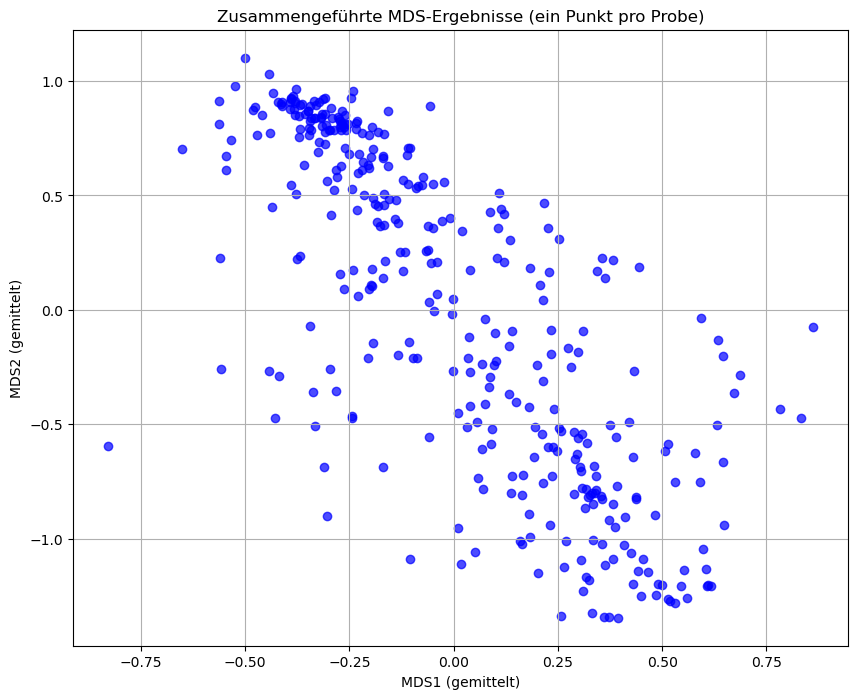

In [13]:
# Mittelung der MDS-Werte über alle Intervalle
mds1_columns = [col for col in df_basis.columns if isinstance(col, str) and col.startswith("MDS1_")]
mds2_columns = [col for col in df_basis.columns if isinstance(col, str) and col.startswith("MDS2_")]

# Berechnung des Durchschnitts für alle Intervalle
df_basis["MDS1_mean"] = df_basis[mds1_columns].mean(axis=1)
df_basis["MDS2_mean"] = df_basis[mds2_columns].mean(axis=1)

# Scatterplot mit zusammengeführten MDS-Werten
plt.figure(figsize=(10, 8))
plt.scatter(df_basis["MDS1_mean"], df_basis["MDS2_mean"], alpha=0.7, color="blue")

# Achsenbeschriftung und Titel
plt.title("Zusammengeführte MDS-Ergebnisse (ein Punkt pro Probe)")
plt.xlabel("MDS1 (gemittelt)")
plt.ylabel("MDS2 (gemittelt)")
plt.grid(True)
plt.show()



In [14]:
df_basis

Temp./°C,-24,-23,-22,-21,-20,-19,-18,-17,-16,-15,...,MDS1_180 bis 200,MDS2_180 bis 200,MDS1_200 bis 220,MDS2_200 bis 220,MDS1_220 bis 240,MDS2_220 bis 240,MDS1_240 bis 260,MDS2_240 bis 260,MDS1_mean,MDS2_mean
L001,-1.895041,-1.882417,-1.867989,-1.850984,-1.830373,-1.806670,-1.783225,-1.765190,-1.745609,-1.726028,...,-0.468522,0.982729,-1.208744,1.345568,-1.856566,1.827018,-3.041527,1.950852,-0.177570,0.366691
L002,-1.897818,-1.881884,-1.865950,-1.848126,-1.825441,-1.803565,-1.784931,-1.766566,-1.750092,-1.733618,...,-0.569039,1.260895,-1.311625,1.543458,-1.934292,1.925044,-3.035831,1.938862,-0.189147,0.461599
L003,-1.855503,-1.836973,-1.818703,-1.803566,-1.787906,-1.768071,-1.744321,-1.722658,-1.704650,-1.685336,...,-0.500495,1.054420,-1.269906,1.436863,-1.967524,1.921014,-3.194775,2.047806,-0.232722,0.434432
L004,-1.765930,-1.754211,-1.737699,-1.719323,-1.702012,-1.687897,-1.674847,-1.657270,-1.641824,-1.624513,...,-0.581706,1.177801,-1.443623,1.616715,-2.156502,2.160441,-3.376199,2.165561,-0.304006,0.561892
L005,-1.863076,-1.848531,-1.827214,-1.807151,-1.790098,-1.770788,-1.751227,-1.732669,-1.715867,-1.701321,...,-0.491511,1.078614,-1.205823,1.373808,-1.824764,1.821253,-2.891617,1.832284,-0.167070,0.368599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
L383,-1.750991,-1.737117,-1.727466,-1.711984,-1.700925,-1.687856,-1.672574,-1.657092,-1.643017,-1.628340,...,-0.748974,1.551549,-1.635424,1.925779,-2.341767,2.381785,-3.564801,2.290102,-0.349636,0.867372
L384,-1.644064,-1.634867,-1.624793,-1.612968,-1.600997,-1.590339,-1.579974,-1.568878,-1.556761,-1.546541,...,-0.695729,1.411285,-1.596362,1.840510,-2.412567,2.384011,-3.902755,2.450866,-0.410989,0.909879
L385,-1.744776,-1.734210,-1.724028,-1.711348,-1.698476,-1.686181,-1.671004,-1.656788,-1.644300,-1.632582,...,-0.750219,1.593718,-1.584419,1.906699,-2.208748,2.247197,-3.397771,2.181881,-0.287819,0.784017
L386,-1.698102,-1.685843,-1.672547,-1.660633,-1.649582,-1.638531,-1.621091,-1.607278,-1.599508,-1.586903,...,-0.719394,1.503733,-1.592555,1.881196,-2.294619,2.325486,-3.593429,2.326804,-0.334097,0.837471


In [15]:
# Alle MDS-Spalten finden, außer den gemittelten Spalten
mds_columns_to_drop = [
    col for col in df_basis.columns
    if isinstance(col, str) and (col.startswith("MDS1_") or col.startswith("MDS2_")) and not col.endswith("_mean")
]

# Entfernen der identifizierten Spalten
df_basis = df_basis.drop(columns=mds_columns_to_drop)

# Ergebnis anzeigen
df_basis.head()


Temp./°C,-24,-23,-22,-21,-20,-19,-18,-17,-16,-15,...,267,268,269,270,271,272,273,274,MDS1_mean,MDS2_mean
L001,-1.895041,-1.882417,-1.867989,-1.850984,-1.830373,-1.806670,-1.783225,-1.765190,-1.745609,-1.726028,...,1.536238,1.548089,1.557107,1.568443,1.580295,1.592404,1.603225,1.611469,-0.177570,0.366691
L002,-1.897818,-1.881884,-1.865950,-1.848126,-1.825441,-1.803565,-1.784931,-1.766566,-1.750092,-1.733618,...,1.506355,1.522558,1.543353,1.561448,1.578732,1.594396,1.609519,1.624643,-0.189147,0.461599
L003,-1.855503,-1.836973,-1.818703,-1.803566,-1.787906,-1.768071,-1.744321,-1.722658,-1.704650,-1.685336,...,1.593247,1.605253,1.613344,1.622739,1.637877,1.654580,1.673894,1.689553,-0.232722,0.434432
L004,-1.765930,-1.754211,-1.737699,-1.719323,-1.702012,-1.687897,-1.674847,-1.657270,-1.641824,-1.624513,...,1.632073,1.637133,1.646188,1.661635,1.674152,1.683739,1.697854,1.711970,-0.304006,0.561892
L005,-1.863076,-1.848531,-1.827214,-1.807151,-1.790098,-1.770788,-1.751227,-1.732669,-1.715867,-1.701321,...,1.469074,1.489137,1.506441,1.521990,1.532021,1.541049,1.548322,1.557099,-0.167070,0.368599


In [16]:
df_basis.to_csv("data/mds_intervals_mean.csv", index=True)